## **Import Data**

In [2]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk(r"C:\Users\carla\Desktop\Models\archive (1)"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\carla\Desktop\Models\archive (1)\ingr_map.pkl
C:\Users\carla\Desktop\Models\archive (1)\interactions_test.csv
C:\Users\carla\Desktop\Models\archive (1)\interactions_train.csv
C:\Users\carla\Desktop\Models\archive (1)\interactions_validation.csv
C:\Users\carla\Desktop\Models\archive (1)\PP_recipes.csv
C:\Users\carla\Desktop\Models\archive (1)\PP_users.csv
C:\Users\carla\Desktop\Models\archive (1)\RAW_interactions.csv
C:\Users\carla\Desktop\Models\archive (1)\RAW_recipes.csv


In [3]:

# Check available files
print("Available files:")
for dirname, _, filenames in os.walk(r"C:\Users\carla\Desktop\Models\archive (1)"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Function to load all CSV files
def load_food_data():
    data_dict = {}
    csv_files = [
        'RAW_interactions.csv',
        'RAW_recipes.csv',
        'PP_recipes.csv',
        'PP_users.csv',
        'interactions_train.csv',
        'interactions_test.csv',
        'interactions_validation.csv'
    ]
    
    print("\nLoading CSV files...")
    for file in csv_files:
        try:
            filepath = fr"C:\Users\carla\Desktop\Models\archive (1)\{file}"
            df = pd.read_csv(filepath)
            key_name = file.replace('.csv', '').lower()
            data_dict[key_name] = df
            
            print(f"\n{file} loaded: {df.shape}")
            print(f"Columns: {df.columns.tolist()}")
            print(df.head(2))
            
        except Exception as e:
            print(f"Error loading {file}: {e}")
    
    print("\n✅ CSV files loaded successfully!")
    return data_dict

# Load all CSV data
food_data = load_food_data()

# Print available dataframes
print("\nAvailable dataframes:")
for key in food_data.keys():
    print(f"- food_data['{key}']")

Available files:
C:\Users\carla\Desktop\Models\archive (1)\ingr_map.pkl
C:\Users\carla\Desktop\Models\archive (1)\interactions_test.csv
C:\Users\carla\Desktop\Models\archive (1)\interactions_train.csv
C:\Users\carla\Desktop\Models\archive (1)\interactions_validation.csv
C:\Users\carla\Desktop\Models\archive (1)\PP_recipes.csv
C:\Users\carla\Desktop\Models\archive (1)\PP_users.csv
C:\Users\carla\Desktop\Models\archive (1)\RAW_interactions.csv
C:\Users\carla\Desktop\Models\archive (1)\RAW_recipes.csv

Loading CSV files...

RAW_interactions.csv loaded: (1132367, 5)
Columns: ['user_id', 'recipe_id', 'date', 'rating', 'review']
   user_id  recipe_id        date  rating  \
0    38094      40893  2003-02-17       4   
1  1293707      40893  2011-12-21       5   

                                              review  
0  Great with a salad. Cooked on top of stove for...  
1  So simple, so delicious! Great for chilly fall...  

RAW_recipes.csv loaded: (231637, 12)
Columns: ['name', 'id', 'minut

## **Data EDA**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Set Matplotlib and Seaborn styles
plt.style.use('ggplot')
sns.set(style="whitegrid")


--- RAW_RECIPES ANALYSIS ---
Total recipes: 231637
Data types:
name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

Missing values:
name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

Recipe statistics:
Average cooking time: 9398.55 minutes
Median cooking time: 40.0 minutes
Average number of steps: 9.77
Average number of ingredients: 9.05


C:\Users\carla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


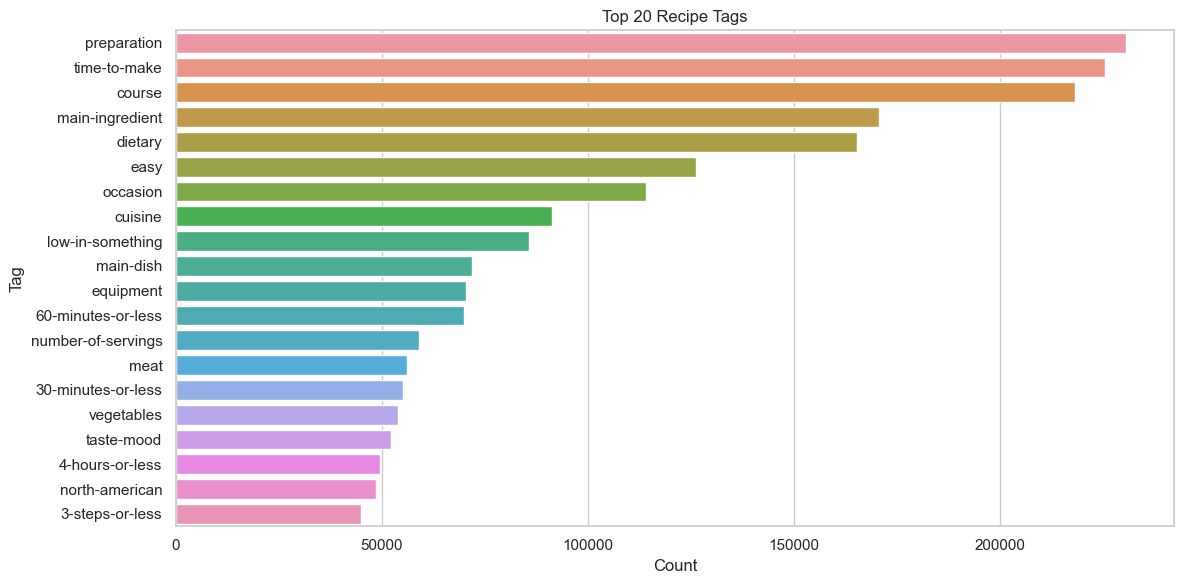

In [6]:
#Basic analysis of RAW_recipes
print("\n--- RAW_RECIPES ANALYSIS ---")
raw_recipes = food_data['raw_recipes']

print(f"Total recipes: {len(raw_recipes)}")
print(f"Data types:\n{raw_recipes.dtypes}")
print(f"\nMissing values:\n{raw_recipes.isnull().sum()}")

# Extract some statistics about recipes
print("\nRecipe statistics:")
print(f"Average cooking time: {raw_recipes['minutes'].mean():.2f} minutes")
print(f"Median cooking time: {raw_recipes['minutes'].median()} minutes")
print(f"Average number of steps: {raw_recipes['n_steps'].mean():.2f}")
print(f"Average number of ingredients: {raw_recipes['n_ingredients'].mean():.2f}")

# Plot distribution of cooking time (excluding outliers)
cooking_times = raw_recipes[raw_recipes['minutes'] <= 300]['minutes']
plt.figure(figsize=(10, 6))
sns.histplot(cooking_times, bins=30, kde=True)
plt.title('Distribution of Cooking Times (minutes)')
plt.xlabel('Time in Minutes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('cooking_times_distribution.png')
plt.close()

# Extract common tags
all_tags = []
for tags in raw_recipes['tags']:
    try:
        tag_list = json.loads(tags.replace("'", '"'))
        all_tags.extend(tag_list)
    except:
        continue

# Get top 20 tags
tag_counts = Counter(all_tags).most_common(20)
tag_df = pd.DataFrame(tag_counts, columns=['tag', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='tag', data=tag_df)
plt.title('Top 20 Recipe Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.tight_layout()
plt.show()


--- RAW_INTERACTIONS ANALYSIS ---
Total interactions: 1132367
Unique users: 226570
Unique recipes: 231637

Missing values:
user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64


C:\Users\carla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


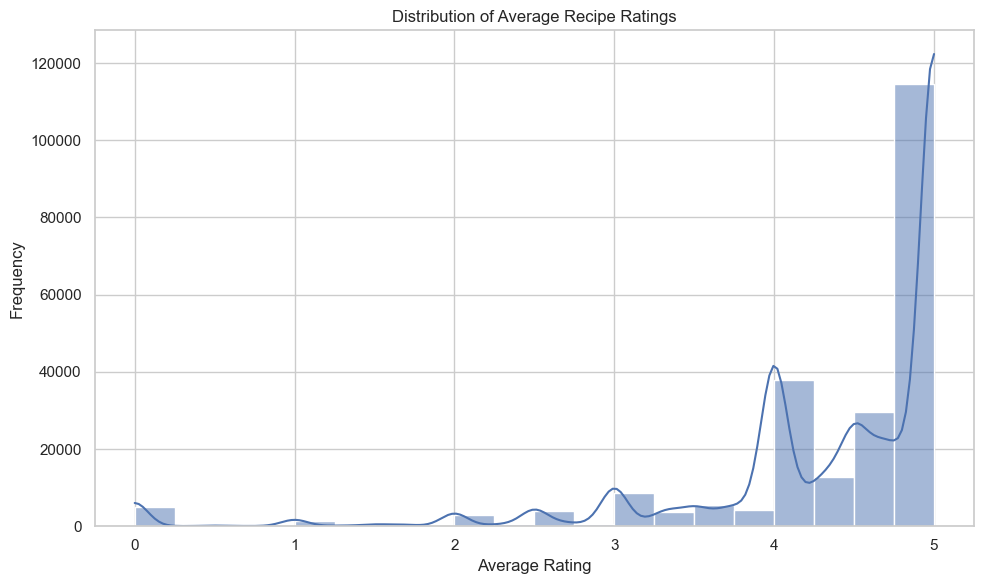

In [7]:

# Basic analysis of RAW_interactions
print("\n--- RAW_INTERACTIONS ANALYSIS ---")
raw_interactions = food_data['raw_interactions']

print(f"Total interactions: {len(raw_interactions)}")
print(f"Unique users: {raw_interactions['user_id'].nunique()}")
print(f"Unique recipes: {raw_interactions['recipe_id'].nunique()}")
print(f"\nMissing values:\n{raw_interactions.isnull().sum()}")

# Rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=raw_interactions)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('rating_distribution.png')
plt.close()

# Calculate average rating per recipe
avg_ratings = raw_interactions.groupby('recipe_id')['rating'].mean().reset_index()
avg_ratings.columns = ['recipe_id', 'avg_rating']

plt.figure(figsize=(10, 6))
sns.histplot(avg_ratings['avg_rating'], bins=20, kde=True)
plt.title('Distribution of Average Recipe Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


--- USER INTERACTION ANALYSIS ---
Average interactions per user: 5.00
Median interactions per user: 1.0
Maximum interactions by a single user: 7671


C:\Users\carla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


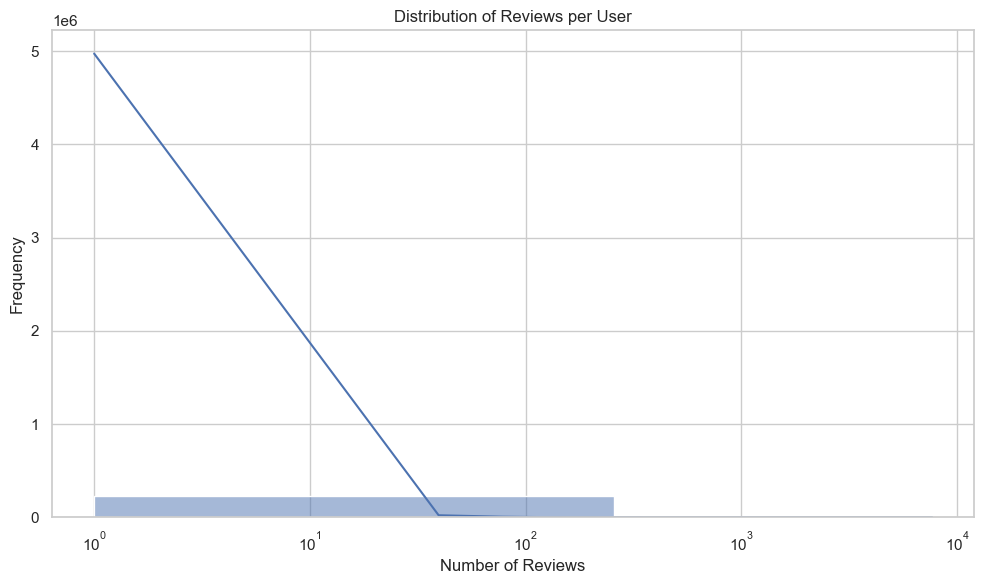

In [8]:
#User interaction analysis
print("\n--- USER INTERACTION ANALYSIS ---")
user_counts = raw_interactions['user_id'].value_counts()

print(f"Average interactions per user: {user_counts.mean():.2f}")
print(f"Median interactions per user: {user_counts.median()}")
print(f"Maximum interactions by a single user: {user_counts.max()}")

# Distribution of number of reviews per user
plt.figure(figsize=(10, 6))
sns.histplot(user_counts.values, bins=30, kde=True)
plt.title('Distribution of Reviews per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.xscale('log')
plt.tight_layout()
plt.show()

In [9]:
print("\n--- PREPROCESSED DATA ANALYSIS ---")
pp_recipes = food_data['pp_recipes']
pp_users = food_data['pp_users']

print(f"Preprocessed recipes shape: {pp_recipes.shape}")
print(f"Preprocessed users shape: {pp_users.shape}")


--- PREPROCESSED DATA ANALYSIS ---
Preprocessed recipes shape: (178265, 8)
Preprocessed users shape: (25076, 6)



--- TRAIN/TEST/VALIDATION SPLIT ANALYSIS ---
Training set size: 698901
Testing set size: 12455
Validation set size: 7023
Training set: 97.29%
Testing set: 1.73%
Validation set: 0.98%


<function matplotlib.pyplot.show(close=None, block=None)>

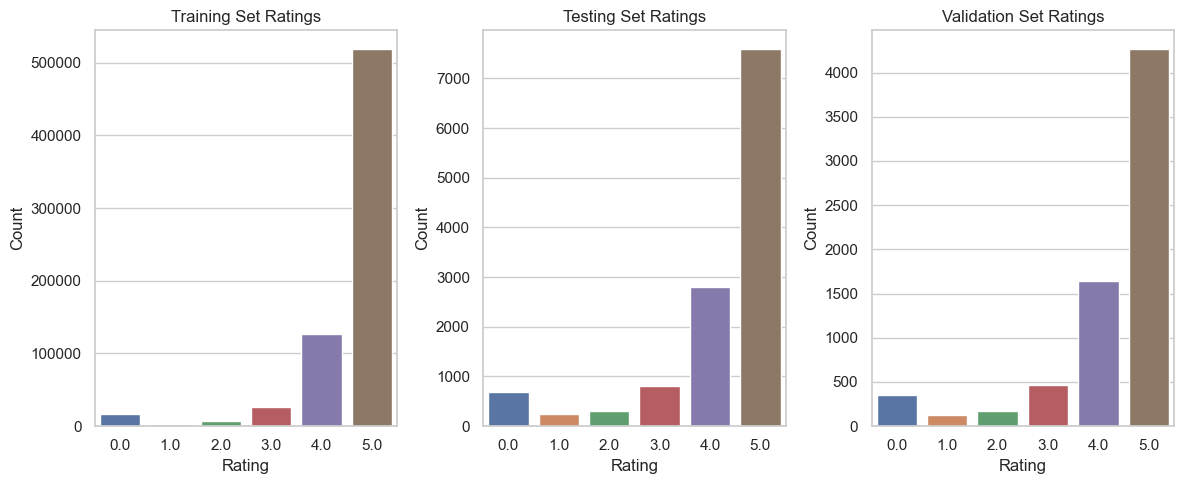

In [10]:
print("\n--- TRAIN/TEST/VALIDATION SPLIT ANALYSIS ---")
train_data = food_data['interactions_train']
test_data = food_data['interactions_test']
validation_data = food_data['interactions_validation']

print(f"Training set size: {len(train_data)}")
print(f"Testing set size: {len(test_data)}")
print(f"Validation set size: {len(validation_data)}")

# Percentage of total
total = len(train_data) + len(test_data) + len(validation_data)
print(f"Training set: {len(train_data)/total*100:.2f}%")
print(f"Testing set: {len(test_data)/total*100:.2f}%")
print(f"Validation set: {len(validation_data)/total*100:.2f}%")

# Check rating distribution in training data
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='rating', data=train_data)
plt.title('Training Set Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.countplot(x='rating', data=test_data)
plt.title('Testing Set Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.countplot(x='rating', data=validation_data)
plt.title('Validation Set Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show

## **Preprocessing and Modeling**

In [12]:
import dask.dataframe as dd
import pandas as pd
from dask import delayed
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Load dataset (assuming raw_recipes is your existing Pandas DataFrame)
raw_recipes = raw_recipes.dropna(subset=['name'])

# Select columns for features and labels
X_full = raw_recipes['ingredients']
y_full = raw_recipes['name']

# Convert Pandas Series to Dask for large dataset handling
X_dd = dd.from_pandas(X_full, npartitions=10)
y_dd = dd.from_pandas(y_full, npartitions=10)

# Initialize a stateless vectorizer (better for incremental processing)
vectorizer = HashingVectorizer(n_features=2**18, alternate_sign=False)

# Initialize an SGDClassifier with correct loss parameter
model = SGDClassifier(loss='log_loss', max_iter=1000)

# Determine unique classes (computed first to ensure partial_fit works)
classes = y_dd.unique().compute().tolist()

# Train incrementally by processing each partition separately
for X_part_delayed, y_part_delayed in zip(X_dd.to_delayed(), y_dd.to_delayed()):
    X_part = X_part_delayed.compute()
    y_part = y_part_delayed.compute()
    
    # Transform text data
    X_part_vect = vectorizer.transform(X_part)
    
    # Incrementally train the model
    model.partial_fit(X_part_vect, y_part, classes=classes)

# Hold-out evaluation (small subset in memory)
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Transform the test data
X_test_vect = vectorizer.transform(X_test)

# Predict and evaluate
y_pred = model.predict(X_test_vect)
print(classification_report(y_test, y_pred))


MemoryError: Unable to allocate 450. GiB for an array with shape (230185, 262144) and data type float64

**Using traditional ML techniques to train this dataset cannot be used or we will have to diminish our dataset significantly. Therefore, we will assess the performance of our model by decreasing the data fed in one experience and by using Neural Networks in another experience.**

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle
import re
from collections import Counter

# --- 1. Enhanced Data Loading and Cleaning ---
def preprocess_ingredients(ingredient_list):
    """Normalize ingredients by:
    - Lowercasing
    - Removing quantities/special chars
    - Removing stop words (optional)
    """
    if isinstance(ingredient_list, str):
        ingredients = eval(ingredient_list)
    else:
        ingredients = ingredient_list
        
    processed = []
    for ing in ingredients:
        ing = re.sub(r'[\d½¼¾⅓⅔⅛⅜⅝⅞]+[^\s]*', '', ing).strip()
        ing = re.sub(r'[^\w\s]', '', ing).lower().strip()
        if ing:
            processed.append(ing)
    return ' '.join(processed)

# Load and preprocess data
raw_recipes = raw_recipes.dropna(subset=['name', 'ingredients'])
raw_recipes['ingredients_processed'] = raw_recipes['ingredients'].apply(preprocess_ingredients)

# --- 2. Dynamic Class Filtering and Splitting ---
def prepare_data(df, min_samples=2, test_size=0.2):
    # Dynamically adjust min_samples to ensure sufficient data
    while min_samples >= 1:
        name_counts = Counter(df['name'])
        valid_names = {name for name, count in name_counts.items() if count >= min_samples}
        filtered_data = df[df['name'].isin(valid_names)]
        
        if len(filtered_data) >= 100:
            print(f"Using min_samples={min_samples} with {len(filtered_data)} samples")
            break
        min_samples -= 1
    else:
        raise ValueError("Insufficient data even with min_samples=1")
    
    # Get all unique classes
    all_classes = filtered_data['name'].unique()
    
    # Split data
    try:
        train_data, test_data = train_test_split(
            filtered_data, 
            test_size=test_size,
            stratify=filtered_data['name'],
            random_state=42
        )
    except ValueError:
        train_data, test_data = train_test_split(
            filtered_data,
            test_size=test_size,
            random_state=42
        )
    
    # Ensure test set contains all classes
    missing_classes = set(all_classes) - set(test_data['name'].unique())
    if missing_classes:
        print(f"Adding {len(missing_classes)} missing classes to test set")
        additional_samples = []
        for cls in missing_classes:
            cls_samples = train_data[train_data['name'] == cls]
            additional_samples.append(cls_samples.sample(1, random_state=42))
        test_data = pd.concat([test_data] + additional_samples)
        train_data = train_data.drop([s.index[0] for s in additional_samples])
    
    return train_data, test_data

# Prepare data
try:
    train_data, test_data = prepare_data(raw_recipes)
except ValueError as e:
    print(f"Error: {e}")
    print("Using all data without filtering")
    train_data, test_data = train_test_split(
        raw_recipes,
        test_size=0.2,
        random_state=42
    )

# --- 3. Label Encoding ---
label_encoder = LabelEncoder()
all_classes = pd.concat([train_data['name'], test_data['name']]).unique()
label_encoder.fit(all_classes)

y_train = label_encoder.transform(train_data['name'])
y_test = label_encoder.transform(test_data['name'])
num_classes = len(label_encoder.classes_)

# Convert to one-hot
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# --- 4. Feature Engineering ---
vectorizer = TfidfVectorizer(
    max_features=2**14,
    ngram_range=(1, 2),
    stop_words='english'
)
X_train = vectorizer.fit_transform(train_data['ingredients_processed'])
X_test = vectorizer.transform(test_data['ingredients_processed'])

# --- 5. Improved Model Architecture ---
input_dim = X_train.shape[1]
model = Sequential([
    Dense(512, activation='relu', input_shape=(input_dim,)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 
             tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top3_accuracy')]
)

# --- 6. Training with Class Weights ---
# Calculate class weights for imbalanced data
class_counts = np.bincount(y_train)
total_samples = np.sum(class_counts)
class_weights = {i: total_samples/(len(class_counts)*count) 
                 for i, count in enumerate(class_counts)}

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train.toarray(), y_train_cat,
    validation_data=(X_test.toarray(), y_test_cat),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    class_weight=class_weights
)

import pickle
from tensorflow.keras.models import model_from_json

# Save the model architecture as JSON
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the trained model 
model.save("model.h5")

# Save the vectorizer and label encoder
with open("recipe_preprocessor.pkl", "wb") as f:
    pickle.dump({'vectorizer': vectorizer, 'label_encoder': label_encoder}, f)

print("Model and preprocessors saved successfully!")

import joblib
import tensorflow as tf

# Save everything in a dictionary
model_data = {
    "model": model,  # TensorFlow/Keras model
    "vectorizer": vectorizer,  # Preprocessing vectorizer
    "label_encoder": label_encoder  # Label encoder
}

# Save to pkl file
joblib.dump(model_data, "recipe_model.pkl")

print("✅ Model and preprocessors saved successfully in recipe_model.pkl!")


# --- 8. Prediction Function ---
def predict_recipe(ingredient_list, top_k=3):
    processed = preprocess_ingredients(ingredient_list)
    vectorized = vectorizer.transform([processed])
    probs = model.predict(vectorized.toarray())[0]
    top_indices = np.argsort(probs)[-top_k:][::-1]
    return [(label_encoder.classes_[i], float(probs[i])) for i in top_indices]

# Example usage
test_ingredients = ["chicken breast", "garlic", "olive oil", "salt"]
print("Top predictions:", predict_recipe(test_ingredients))

Using min_samples=2 with 2881 samples
Adding 905 missing classes to test set


C:\Users\carla\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\carla\AppData\Local\Temp\ipykernel_21108\629952997.py:145: RuntimeWarning: divide by zero encountered in scalar divide
  class_weights = {i: total_samples/(len(class_counts)*count)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.0000e+00 - loss: 7.0882 - top3_accuracy: 0.0026 - val_accuracy: 6.7476e-04 - val_loss: 7.2662 - val_top3_accuracy: 0.0020
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0085 - loss: 6.7527 - top3_accuracy: 0.0225 - val_accuracy: 6.7476e-04 - val_loss: 7.2676 - val_top3_accuracy: 0.0020
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.0311 - loss: 6.5417 - top3_accuracy: 0.0642 - val_accuracy: 6.7476e-04 - val_loss: 7.2685 - val_top3_accuracy: 0.0020
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.0917 - loss: 6.2897 - top3_accuracy: 0.1796 - val_accuracy: 6.7476e-04 - val_loss: 7.2682 - val_top3_accuracy: 0.0027
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.1659 - loss: 6.0762 - top3_accuracy: 0.2831 - val_accuracy: 6.7476e-04 - val_loss: 7.2655 - val_top3_accuracy: 0.0027
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.2787 - loss: 5.8

Model and preprocessors saved successfully!
✅ Model and preprocessors saved successfully in recipe_model.pkl!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
Top predictions: [('tuscan style chicken', 0.0574655644595623), ('tomato basil chicken breasts', 0.0262469369918108), ('oven fried eggplant', 0.023083409294486046)]
